In [17]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from causallearn.search.ConstraintBased.PC import pc

import functions

In [66]:
keys=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD', 'M_BH', 'M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo']

In [67]:
len(keys)

72

In [68]:
df_full = pd.read_csv('SMBH_Data_0522.csv',header=1)
df = df_full[keys].dropna(axis='index',how='any')
df

,ETG,T-type,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,Pseudobulge,...,logblum,logSigma0sph,LogSigma0,R10,logR10,logR10phi,Rh,logRh,logRhphi,logHalo
1,1,-4.8,0,0.0,0,1.0,0,0,1.0,0,...,10.7372,8.218084,4.704516,34.766963,1.541167,10.148833,8.079469,0.907383,10.782617,13.959319
3,1,-4.9,0,0.0,0,0.0,0,0,1.0,0,...,11.1172,5.486389,4.033710,18.612540,1.269806,10.470194,7.044676,0.847861,10.892139,14.060462
5,1,-1.9,1,1.0,0,0.0,0,0,0.0,0,...,10.2816,6.294257,3.790449,9.360143,0.971282,9.791918,1.618051,0.208992,10.554208,12.563130
6,1,-2.8,0,1.0,0,0.0,0,0,0.0,0,...,8.7472,4.025433,4.008665,0.697465,-0.156477,9.346477,0.365014,-0.437691,9.627691,11.525458
7,1,-1.2,0,1.0,0,1.0,0,0,0.0,0,...,10.7976,3.648904,4.059098,11.966130,1.077954,10.302046,2.962211,0.471616,10.908384,13.405242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0,2.9,1,1.0,0,0.0,0,0,0.0,1,...,10.8796,8.242104,4.714507,18.008377,1.255475,10.014525,2.434609,0.386429,10.883571,13.233744
133,0,2.3,0,1.0,1,0.0,0,0,1.0,1,...,10.0440,4.922064,4.836918,8.813445,0.945146,9.564854,0.942243,-0.025837,10.535837,12.289895
134,0,2.2,0,1.0,0,0.0,0,0,1.0,1,...,9.9796,4.021619,4.798361,10.510415,1.021620,9.718380,1.828245,0.262034,10.477966,12.536387
136,0,4,0,1.0,0,0.0,0,0,0.0,1,...,10.5304,4.140150,4.714823,16.634078,1.220999,9.589001,3.155569,0.499078,10.310922,12.618079


In [21]:
remove=['logRho_soi_approx_new', 'log_Rho_soi_exact_new','Avg_Rho_soi_exact_all', 'Rho_r_soi_2BH_approx','M_BH']
for ele in remove: 
    keys.remove(ele)
X = df[keys]
y = df['logRho_soi_approx_new']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training Set RMSE:  0.24699339850130075
Test Set RMSE:  0.4178738790528491


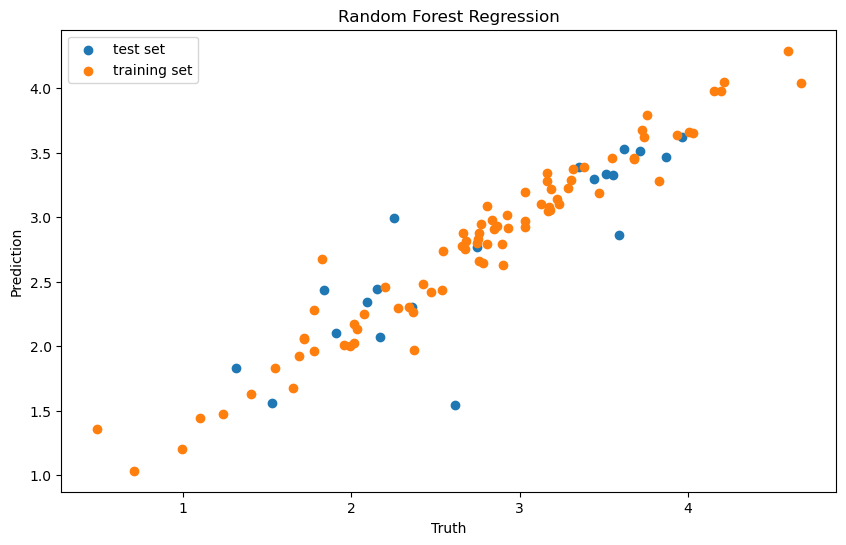

In [23]:
# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the training and test set loss (Mean Squared Error)
# functions.rmse
#train_loss = np.mean((y_train - rf_regressor.predict(X_train)) ** 2)
#test_loss = np.mean((y_test - y_pred) ** 2)
train_rmse = functions.rmse(y_train,rf_regressor.predict(X_train))
test_rmse = functions.rmse(y_test,y_pred)

print("Training Set RMSE: ",train_rmse)
print("Test Set RMSE: ",test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="test set")
plt.scatter(y_train, rf_regressor.predict(X_train), label="training set")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

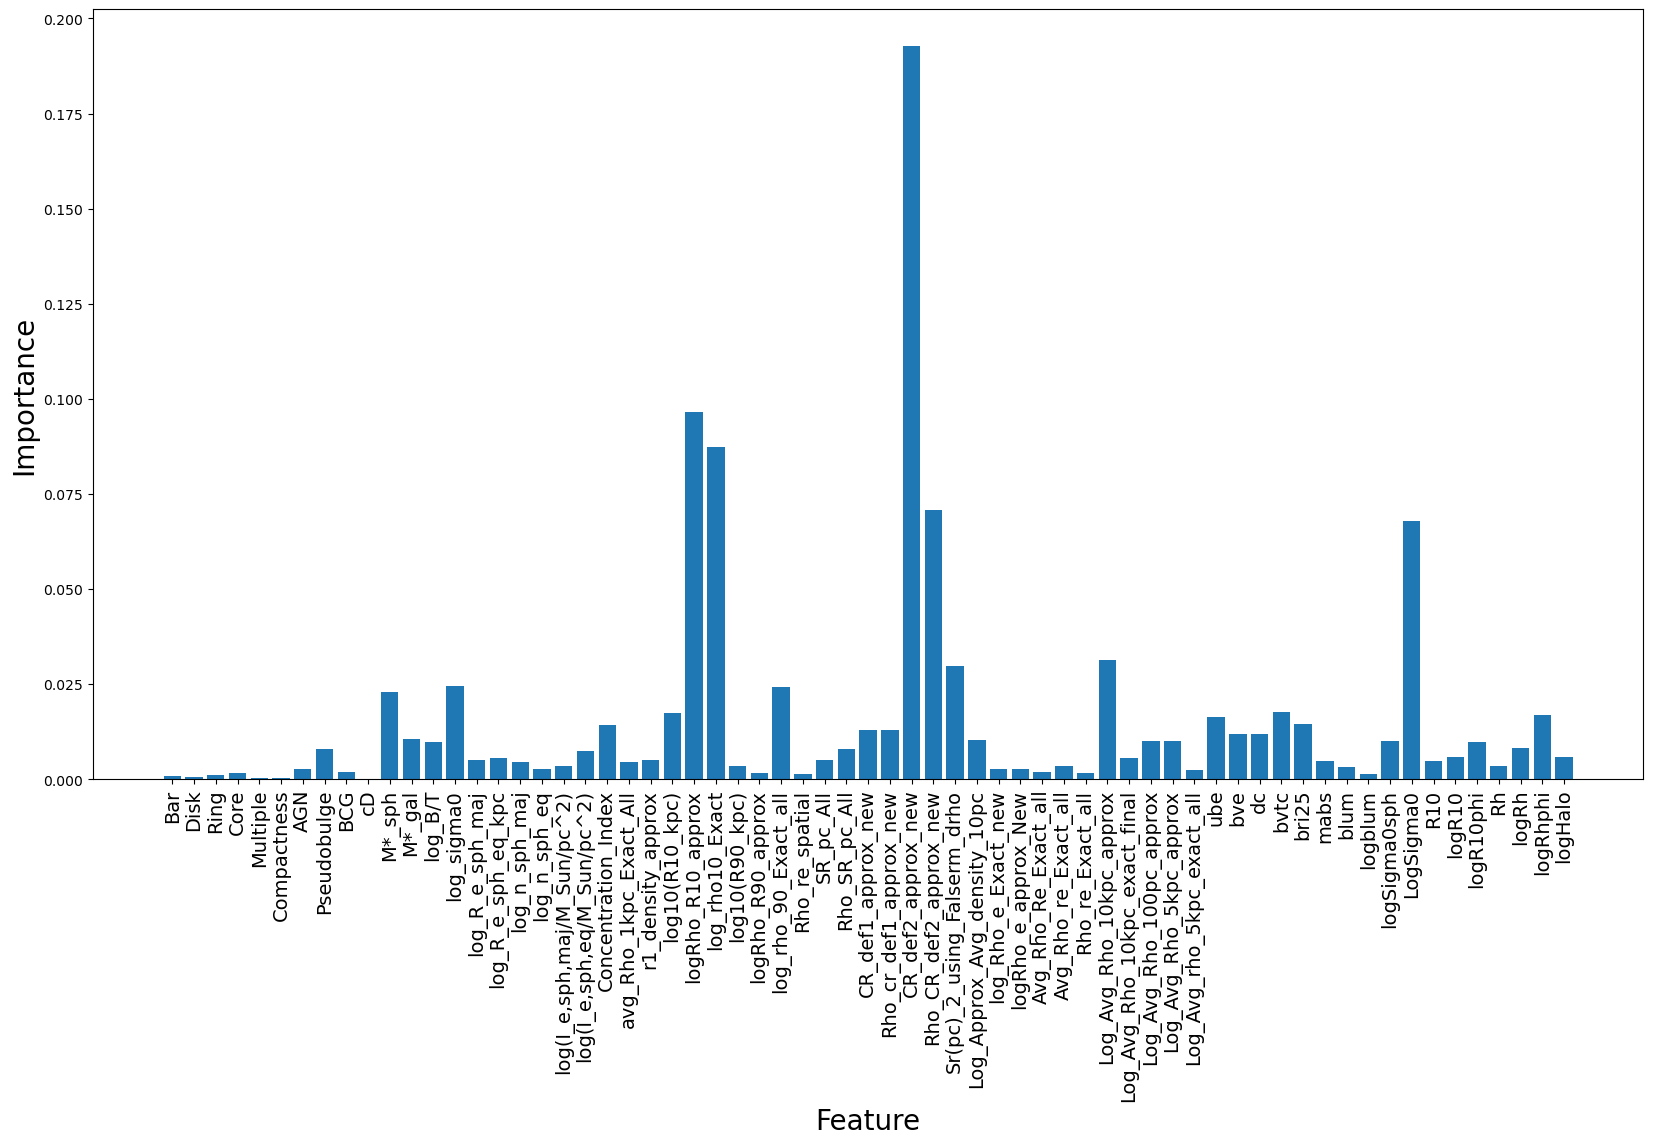

In [24]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

In [25]:
importance_order=feature_importances.argsort()[::-1]
importance=np.sort(feature_importances)[::-1]
importance_order

array([34, 24, 25, 35, 57, 43, 36, 13, 28, 10, 51, 23, 63, 48, 52, 20, 33,
       32, 50, 49, 11, 37, 45, 56, 46, 12, 60, 62, 31,  7, 19, 64, 59, 44,
       15, 22, 30, 14, 58, 53, 16, 21, 18, 26, 41, 61, 54, 17,  6, 39, 38,
       47, 40,  8, 42, 27,  3, 55, 29,  2,  0,  1,  4,  5,  9])

In [26]:
for i in range(len(importance_order)):
    print(i+1,X.columns[importance_order[i]],importance[i])

1 CR_def2_approx_new 0.19275676542571202
2 logRho_R10_approx 0.09646814336056819
3 log_rho10_Exact 0.08725544870468833
4 Rho_CR_def2_approx_new 0.07070886044590076
5 LogSigma0 0.06793221054774996
6 Log_Avg_Rho_10kpc_approx 0.03144598651150985
7 Sr(pc)_2_using_Falserm_drho 0.02986571457515972
8 log_sigma0 0.0244721653423203
9 log_rho_90_Exact_all 0.024165873405780518
10 M*_sph 0.022921647665039714
11 bvtc 0.0176379246195285
12 log10(R10_kpc) 0.01740609166812266
13 logRhphi 0.01701472120720802
14 ube 0.016453728930531875
15 bri25 0.014444299048618112
16 Concentration_Index 0.014159866754698998
17 Rho_cr_def1_approx_new 0.012902776807935478
18 CR_def1_approx_new 0.012855565410707495
19 dc 0.011899288261095724
20 bve 0.011881380108908303
21 M*_gal 0.010613974411996636
22 Log_Approx_Avg_density_10pc 0.010426593109408749
23 Log_Avg_Rho_100pc_approx 0.010065544063656635
24 logSigma0sph 0.010051540574547456
25 Log_Avg_Rho_5kpc_approx 0.010040051453181518
26 log_B/T 0.009939045847369548
27 logR

In [27]:
X.columns[importance_order][:10]

Index(['CR_def2_approx_new', 'logRho_R10_approx', 'log_rho10_Exact',
       'Rho_CR_def2_approx_new', 'LogSigma0', 'Log_Avg_Rho_10kpc_approx',
       'Sr(pc)_2_using_Falserm_drho', 'log_sigma0', 'log_rho_90_Exact_all',
       'M*_sph'],
      dtype='object')

In [28]:
X.columns[importance_order]

Index(['CR_def2_approx_new', 'logRho_R10_approx', 'log_rho10_Exact',
       'Rho_CR_def2_approx_new', 'LogSigma0', 'Log_Avg_Rho_10kpc_approx',
       'Sr(pc)_2_using_Falserm_drho', 'log_sigma0', 'log_rho_90_Exact_all',
       'M*_sph', 'bvtc', 'log10(R10_kpc)', 'logRhphi', 'ube', 'bri25',
       'Concentration_Index', 'Rho_cr_def1_approx_new', 'CR_def1_approx_new',
       'dc', 'bve', 'M*_gal', 'Log_Approx_Avg_density_10pc',
       'Log_Avg_Rho_100pc_approx', 'logSigma0sph', 'Log_Avg_Rho_5kpc_approx',
       'log_B/T', 'logR10phi', 'logRh', 'Rho_SR_pc_All', 'Pseudobulge',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'logHalo', 'logR10',
       'Log_Avg_Rho_10kpc_exact_final', 'log_R_e_sph_eq_kpc',
       'r1_density_approx', 'SR_pc_All', 'log_R_e_sph_maj', 'R10', 'mabs',
       'log_n_sph_maj', 'avg_Rho_1kpc_Exact_All',
       'log(I_e,sph,maj/M_Sun/pc^2)', 'log10(R90_kpc)', 'Avg_Rho_re_Exact_all',
       'Rh', 'blum', 'log_n_sph_eq', 'AGN', 'logRho_e_approx_New',
       'log_Rho_e_Exact_new',

0      1
1      1
2      1
3      1
4      1
      ..
140    0
141    0
142    0
143    0
144    0
Name: ETG, Length: 145, dtype: int64

Training Set RMSE:  0.2414458874970939
Test Set RMSE:  0.49237030551312083


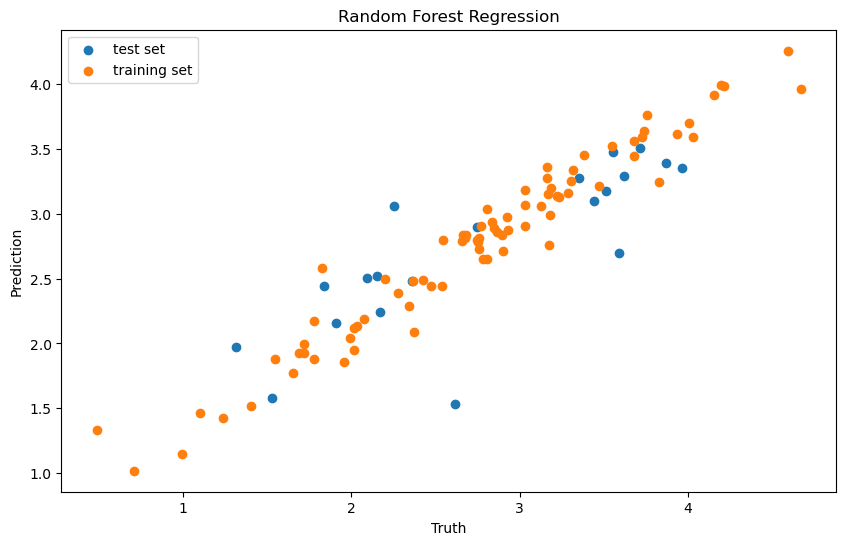

In [45]:
keys=['Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD', 'M_BH', 'M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo']

df_full = pd.read_csv('SMBH_Data_0522.csv',header=1)
df = df_full[keys].dropna(axis='index',how='any')

remove=['logRho_soi_approx_new', 'log_Rho_soi_exact_new','Avg_Rho_soi_exact_all', 'Rho_r_soi_2BH_approx','M_BH',
        'CR_def2_approx_new','Rho_CR_def2_approx_new','Sr(pc)_2_using_Falserm_drho','CR_def1_approx_new','SR_pc_All','Rho_SR_pc_All']
for ele in remove: 
    #print(ele)
    keys.remove(ele)
X = df[keys]
y = df['logRho_soi_approx_new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the training and test set loss (Mean Squared Error)
# functions.rmse
#train_loss = np.mean((y_train - rf_regressor.predict(X_train)) ** 2)
#test_loss = np.mean((y_test - y_pred) ** 2)
train_rmse = functions.rmse(y_train,rf_regressor.predict(X_train))
test_rmse = functions.rmse(y_test,y_pred)

print("Training Set RMSE: ",train_rmse)
print("Test Set RMSE: ",test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="test set")
plt.scatter(y_train, rf_regressor.predict(X_train), label="training set")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

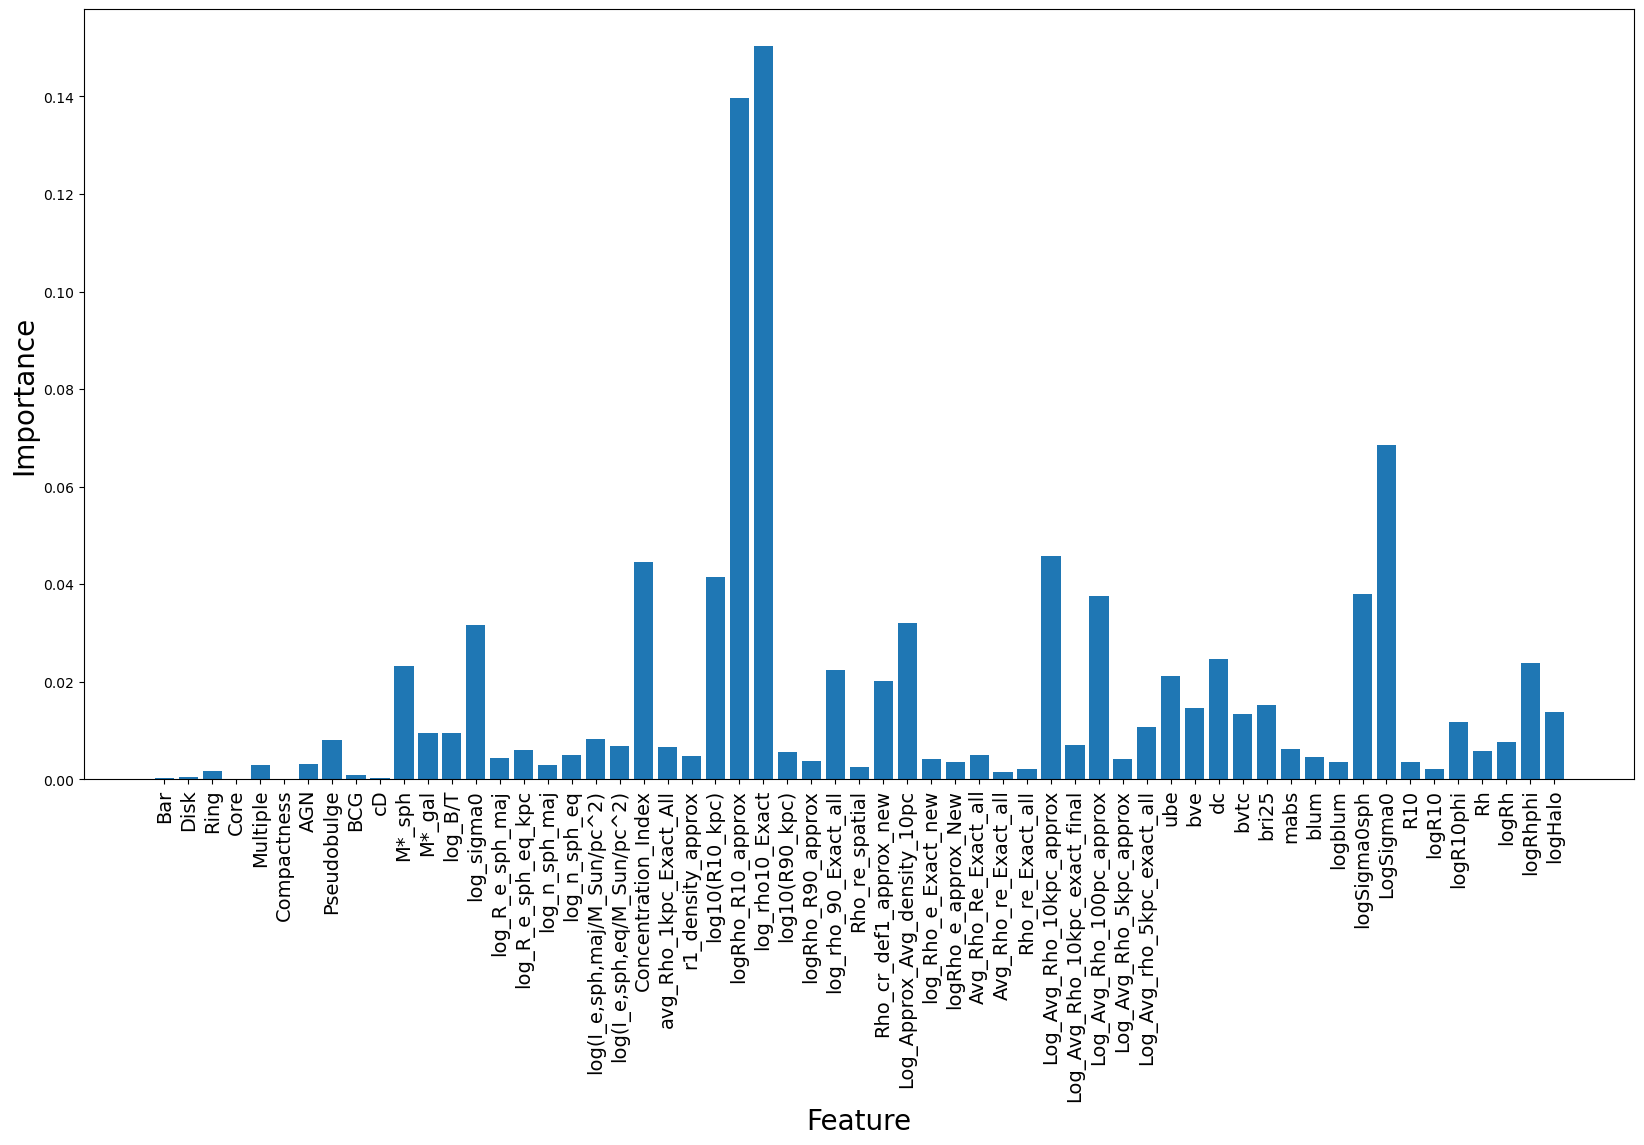

In [46]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

In [47]:
importance_order=feature_importances.argsort()[::-1]
importance=np.sort(feature_importances)[::-1]
#importance_order
for i in range(len(importance_order)):
    print(i+1,X.columns[importance_order[i]],importance[i])

1 log_rho10_Exact 0.15034747057199693
2 logRho_R10_approx 0.13975131086712592
3 LogSigma0 0.06849961728247614
4 Log_Avg_Rho_10kpc_approx 0.04579696510721813
5 Concentration_Index 0.04454999538858655
6 log10(R10_kpc) 0.04154662623822584
7 logSigma0sph 0.03791176230706387
8 Log_Avg_Rho_100pc_approx 0.03749712056742591
9 Log_Approx_Avg_density_10pc 0.0320990251942062
10 log_sigma0 0.031587593159235025
11 dc 0.02459448622110707
12 logRhphi 0.02376285461159525
13 M*_sph 0.023271006666580565
14 log_rho_90_Exact_all 0.022457268982318337
15 ube 0.021149310466596637
16 Rho_cr_def1_approx_new 0.020067609035243225
17 bri25 0.015313573184148601
18 bve 0.014533362003924848
19 logHalo 0.013711241228681907
20 bvtc 0.013463072116296935
21 logR10phi 0.011724355734480812
22 Log_Avg_rho_5kpc_exact_all 0.010726607735435954
23 M*_gal 0.009503027206348495
24 log_B/T 0.009458520124194448
25 log(I_e,sph,maj/M_Sun/pc^2) 0.008234576368049081
26 Pseudobulge 0.008084584311104944
27 logRh 0.0076562163046484
28 Log

In [48]:
keys=['LogSigma0','Concentration_Index','logSigma0sph','log_sigma0','dc','logRhphi','M*_sph','ube','bri25','bve','bvtc','logR10phi','M*_gal','log_B/T',
 'Pseudobulge','logRh','log_n_sph_eq','blum','log_R_e_sph_maj','logblum','AGN','Multiple','log_n_sph_maj','logR10','Ring','BCG','Disk','cD',
 'Bar','Core','Compactness']

Training Set RMSE:  0.25187468917128686
Test Set RMSE:  0.48447454546874924


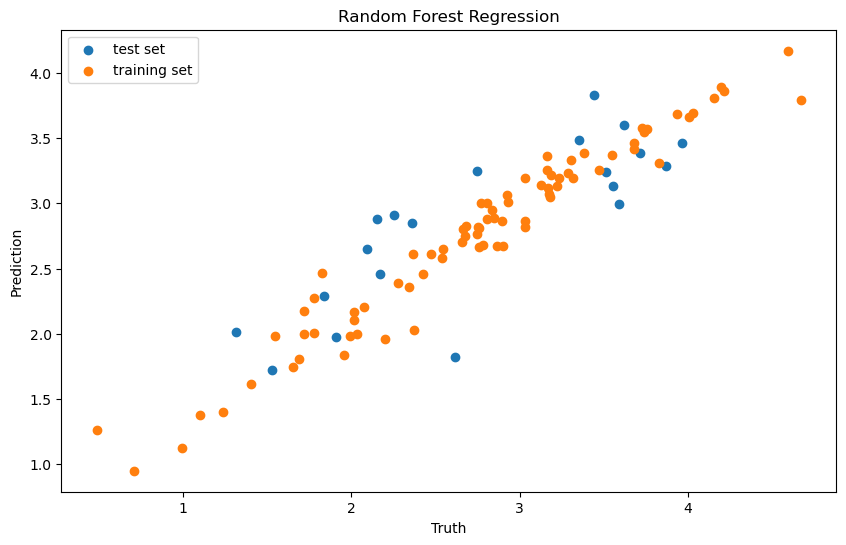

In [49]:
X = df[keys]
y = df['logRho_soi_approx_new']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the training and test set loss (Mean Squared Error)
# functions.rmse
#train_loss = np.mean((y_train - rf_regressor.predict(X_train)) ** 2)
#test_loss = np.mean((y_test - y_pred) ** 2)
train_rmse = functions.rmse(y_train,rf_regressor.predict(X_train))
test_rmse = functions.rmse(y_test,y_pred)

print("Training Set RMSE: ",train_rmse)
print("Test Set RMSE: ",test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="test set")
plt.scatter(y_train, rf_regressor.predict(X_train), label="training set")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

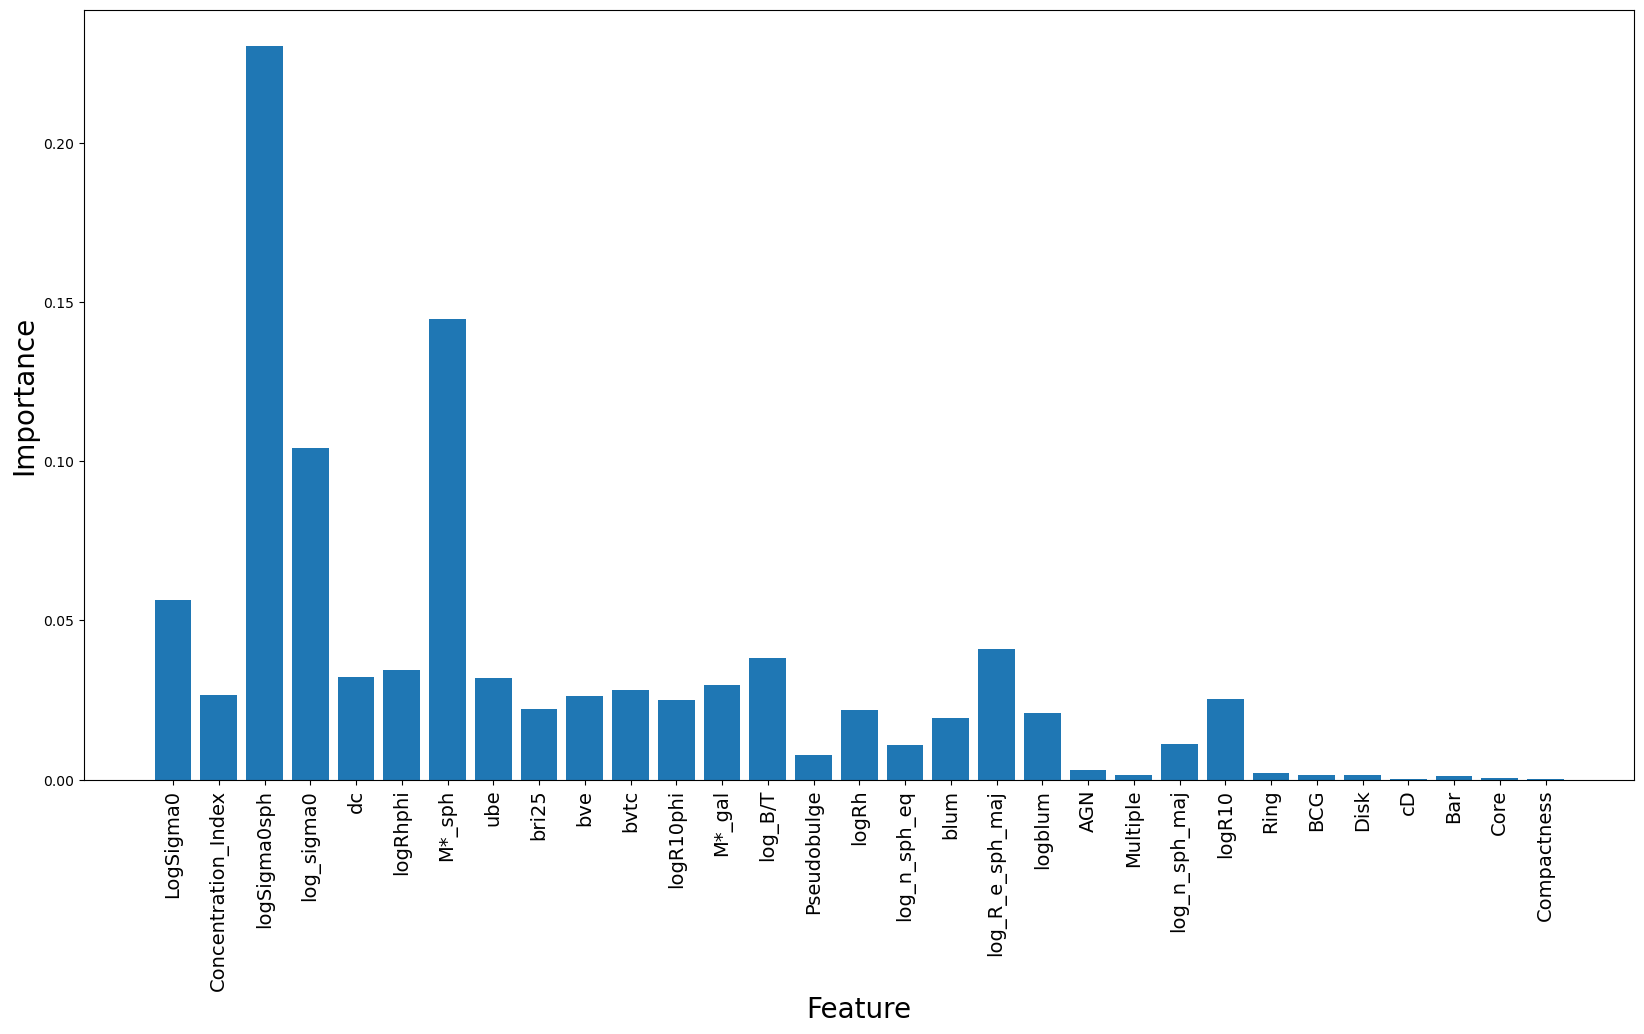

In [50]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

Training Set RMSE:  0.18224237398310988
Test Set RMSE:  0.30592814760986


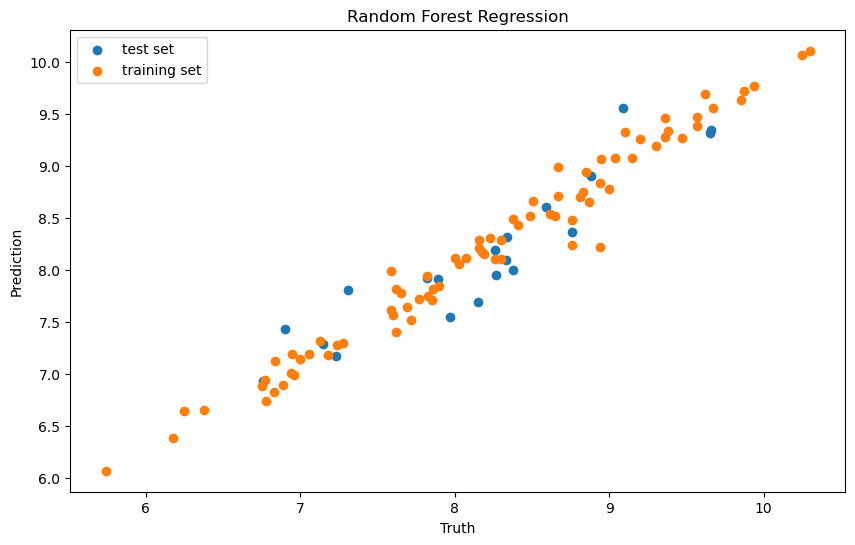

In [51]:
X = df[keys]
y = df['M_BH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate the training and test set loss (Mean Squared Error)
# functions.rmse
#train_loss = np.mean((y_train - rf_regressor.predict(X_train)) ** 2)
#test_loss = np.mean((y_test - y_pred) ** 2)
train_rmse = functions.rmse(y_train,rf_regressor.predict(X_train))
test_rmse = functions.rmse(y_test,y_pred)

print("Training Set RMSE: ",train_rmse)
print("Test Set RMSE: ",test_rmse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label="test set")
plt.scatter(y_train, rf_regressor.predict(X_train), label="training set")
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Random Forest Regression")
plt.legend()
plt.show()

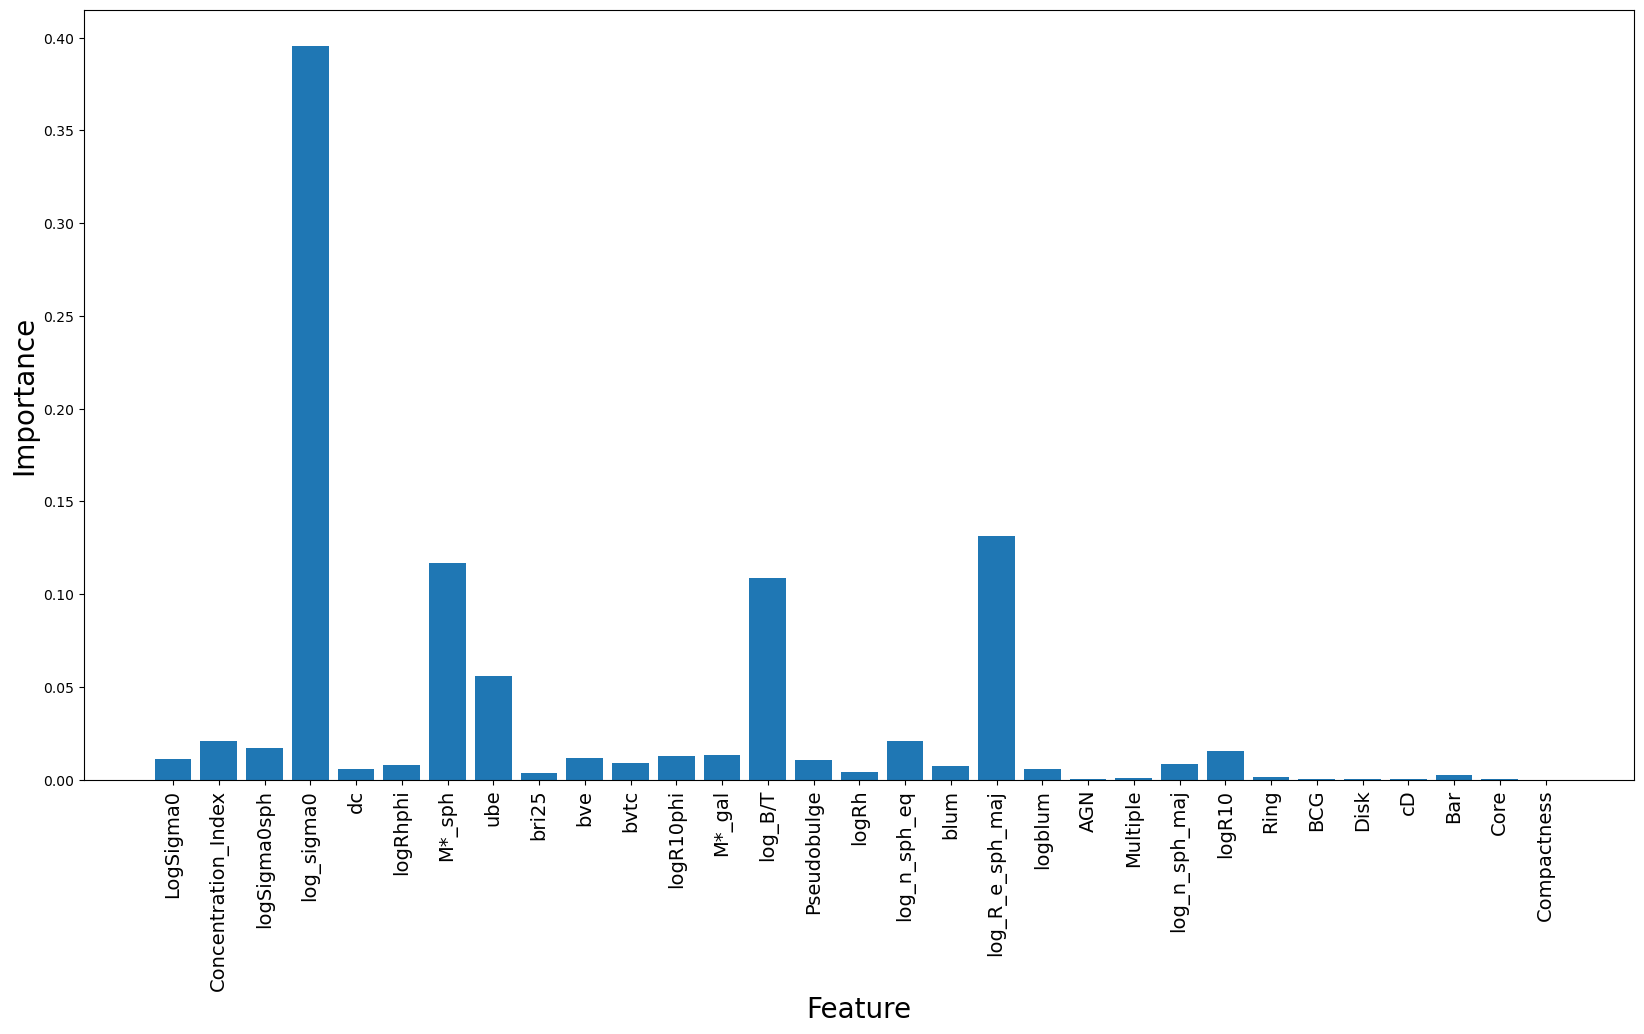

In [52]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

In [13]:
functions.test_relation2(['CR_def2_approx_new', 'logRho_R10_approx', 'log_rho10_Exact',
       'Rho_CR_def2_approx_new', 'LogSigma0', 'Log_Avg_Rho_10kpc_approx',
       'Sr(pc)_2_using_Falserm_drho', 'log_sigma0', 'log_rho_90_Exact_all',
       'M*_sph','logRho_soi_approx_new'],ncyclesperiteration=5000,niterations=300)

120


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
y   : logRho_soi_approx_new
x 0 : CR_def2_approx_new
x 1 : logRho_R10_approx
x 2 : log_rho10_Exact
x 3 : Rho_CR_def2_approx_new
x 4 : LogSigma0
x 5 : Log_Avg_Rho_10kpc_approx
x 6 : Sr(pc)_2_using_Falserm_drho
x 7 : log_sigma0
x 8 : log_rho_90_Exact_all
x 9 : M*_sph
Eq. selected rmse: 0.5888321551808372


x2 - 0.1922903341020106*x8 + 0.9836158907070021

Eq. 0 rmse: 0.8622609005178279


2.7495288442925525

Eq. 1 rmse: 0.6629697299822642


x2 + 1.3272080665053179

Eq. 2 rmse: 0.6219346449547941


0.7222960113991712*x2 + 1.7221922195773667

Eq. 3 rmse: 0.5888321551808372


x2 - 0.1922903341020106*x8 + 0.9836158907070021

Eq. 4 rmse: 0.5811976909322898


x2 + x5*x8/x9 + 0.9891198404840316

Eq. 5 rmse: 0.5546067019204571


x6/(-x6/x5 + x9/x3) + 1.0257038088552213

Eq. 6 rmse: 0.5303826232294272


x2 + 0.7753045769165813 + x6*(-x1*x9 + 31.887939726869373)/x0

Eq. 7 rmse: 0.511658734010639


x2 + 0.794033967009258 + x4*x6*(-x1*x7 + 6.955620639644673)/x0

Eq. 8 rmse: 0.5084531806710457


x2 + 0.7961573163638402 + x6*(x4*(-x1*x7 + 10.208884976550806) - 14.314239111981635)/x0

Eq. 9 rmse: 0.5034819311071794


x2 + 0.6693361666427285 + x6*(x9 + (x1 + x6)*(-x1 + x4 - x7))/x0

Eq. 10 rmse: 0.4988022064557423


x2 + 0.6110953305800463 + x6*(0.01628039171678329*x0 + x4*(-x1*x7 + x4 + 2.6705662902125735))/x0

In [14]:
functions.test_relation(['log_sigma0','log_B/T','log_rho10_Exact','log_rho_90_Exact_all','CR_def2_approx_new','LogSigma0'])

120


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : log_rho10_Exact
x 3 : log_rho_90_Exact_all
x 4 : CR_def2_approx_new
x 5 : LogSigma0
Eq. selected rmse: 0.32830955839238385


x0**2 - 0.1801337983163549*x3 + 2.6306986649813496

Eq. 0 rmse: 0.9413956355234717


8.154789190606317

Eq. 1 rmse: 0.6942817280468987


x1 + 8.596363278229154

Eq. 2 rmse: 0.41365625246145366


x0*(x0 + 1.3554024917287673)

Eq. 3 rmse: 0.37085599725895957


x0**2 + x1 + 3.4883320805547964

Eq. 4 rmse: 0.3532211824172859


x0**2 + 0.61619790662941044*x1 + 3.3391684011275036

Eq. 5 rmse: 0.32830955839238385


x0**2 - 0.1801337983163549*x3 + 2.6306986649813496

Eq. 6 rmse: 0.31738078791848334


x0*(-0.032587424084850616*x0*x3 + x0 - 0.5887681995077161) + 3.9273039754929013

Eq. 7 rmse: 0.3077945299939476


x0*(x0 + 0.14457860126995441*x1 - 0.06272372474767053*x3 - 0.6094127906039896) + 4.192763047581473

Eq. 8 rmse: 0.3032702018824413


x0*(x0 + 0.06272372474767053*x1*(x0 - x1) - 0.06272372474767053*x3 - 0.6094127906039896) + 4.192763047581473

Eq. 9 rmse: 0.3020955116776074


x0*(x0 + 0.06272372474767053*x1*(x0 + x1**2) - 0.06272372474767053*x3 - 0.6094127906039896) + 4.192763047581473

In [15]:
functions.test_relation(['log_sigma0','log_B/T','log_rho10_Exact','log_rho_90_Exact_all','CR_def2_approx_new','LogSigma0'],ncyclesperiteration=5000,niterations=300)

120


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : log_rho10_Exact
x 3 : log_rho_90_Exact_all
x 4 : CR_def2_approx_new
x 5 : LogSigma0
Eq. selected rmse: 0.35524077418172245


3.812686423486833*x0 + x1

Eq. 0 rmse: 0.9413956355234717


8.154789190606477

Eq. 1 rmse: 0.4913517720559613


3.6256119249612833*x0

Eq. 2 rmse: 0.35524077418172245


3.812686423486833*x0 + x1

Eq. 3 rmse: 0.3543885467126097


3.8054676060257524*x0 + 0.94632395997869966*x1

Eq. 4 rmse: 0.3197630706127693


x0*(x0 - 0.07361102472701743*x3) + 2.587887367013115

Eq. 5 rmse: 0.31597273126555125


x0*(x0 + 0.06482275372094175*x1 - 0.06482275372094175*x3) + 2.7046144827248737

Eq. 6 rmse: 0.3115792684243033


x0*(0.9236061266181285*x0 + 0.07639387338187148*x1 - 0.07639387338187148*x3) + 3.0478508082174427

Eq. 7 rmse: 0.3017054321213607


x0*(x0 + 0.07236502423915617*(x1 - 0.5472940522249519)*(x3 + x5)) + 3.3814633563965693

Eq. 8 rmse: 0.2963132265264797


x0*(x0 + 0.05155462812631376*(x3 + x5)*(-x0 + x1 + 1.295623301770727)) + 3.364738973357689

Eq. 9 rmse: 0.29488993329812474


x0*(0.04587728726451092*x0*x1*(x3 + 3.364738973357689) + x0 - 0.04587728726451092*x3 - 0.04587728726451092*x5) + 3.364738973357689

Eq. 10 rmse: 0.2932457878088883


x0*(0.04587728726451092*x0*x1*(x0 + x3 + 1.1322970296381774) + x0 - 0.04587728726451092*x3 - 0.04587728726451092*x5) + 3.364738973357689

In [16]:
df

,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,Pseudobulge,BCG,cD,...,logblum,logSigma0sph,LogSigma0,R10,logR10,logR10phi,Rh,logRh,logRhphi,logHalo
1,0,0.0,0,1.0,0,0,1.0,0,1,0,...,10.7372,8.218084,4.704516,34.766963,1.541167,10.148833,8.079469,0.907383,10.782617,13.959319
3,0,0.0,0,0.0,0,0,1.0,0,1,0,...,11.1172,5.486389,4.033710,18.612540,1.269806,10.470194,7.044676,0.847861,10.892139,14.060462
5,1,1.0,0,0.0,0,0,0.0,0,0,0,...,10.2816,6.294257,3.790449,9.360143,0.971282,9.791918,1.618051,0.208992,10.554208,12.563130
6,0,1.0,0,0.0,0,0,0.0,0,0,0,...,8.7472,4.025433,4.008665,0.697465,-0.156477,9.346477,0.365014,-0.437691,9.627691,11.525458
7,0,1.0,0,1.0,0,0,0.0,0,1,0,...,10.7976,3.648904,4.059098,11.966130,1.077954,10.302046,2.962211,0.471616,10.908384,13.405242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,1,1.0,0,0.0,0,0,0.0,1,0,0,...,10.8796,8.242104,4.714507,18.008377,1.255475,10.014525,2.434609,0.386429,10.883571,13.233744
133,0,1.0,1,0.0,0,0,1.0,1,0,0,...,10.0440,4.922064,4.836918,8.813445,0.945146,9.564854,0.942243,-0.025837,10.535837,12.289895
134,0,1.0,0,0.0,0,0,1.0,1,0,0,...,9.9796,4.021619,4.798361,10.510415,1.021620,9.718380,1.828245,0.262034,10.477966,12.536387
136,0,1.0,0,0.0,0,0,0.0,1,0,0,...,10.5304,4.140150,4.714823,16.634078,1.220999,9.589001,3.155569,0.499078,10.310922,12.618079


  0%|          | 0/8 [00:00<?, ?it/s]

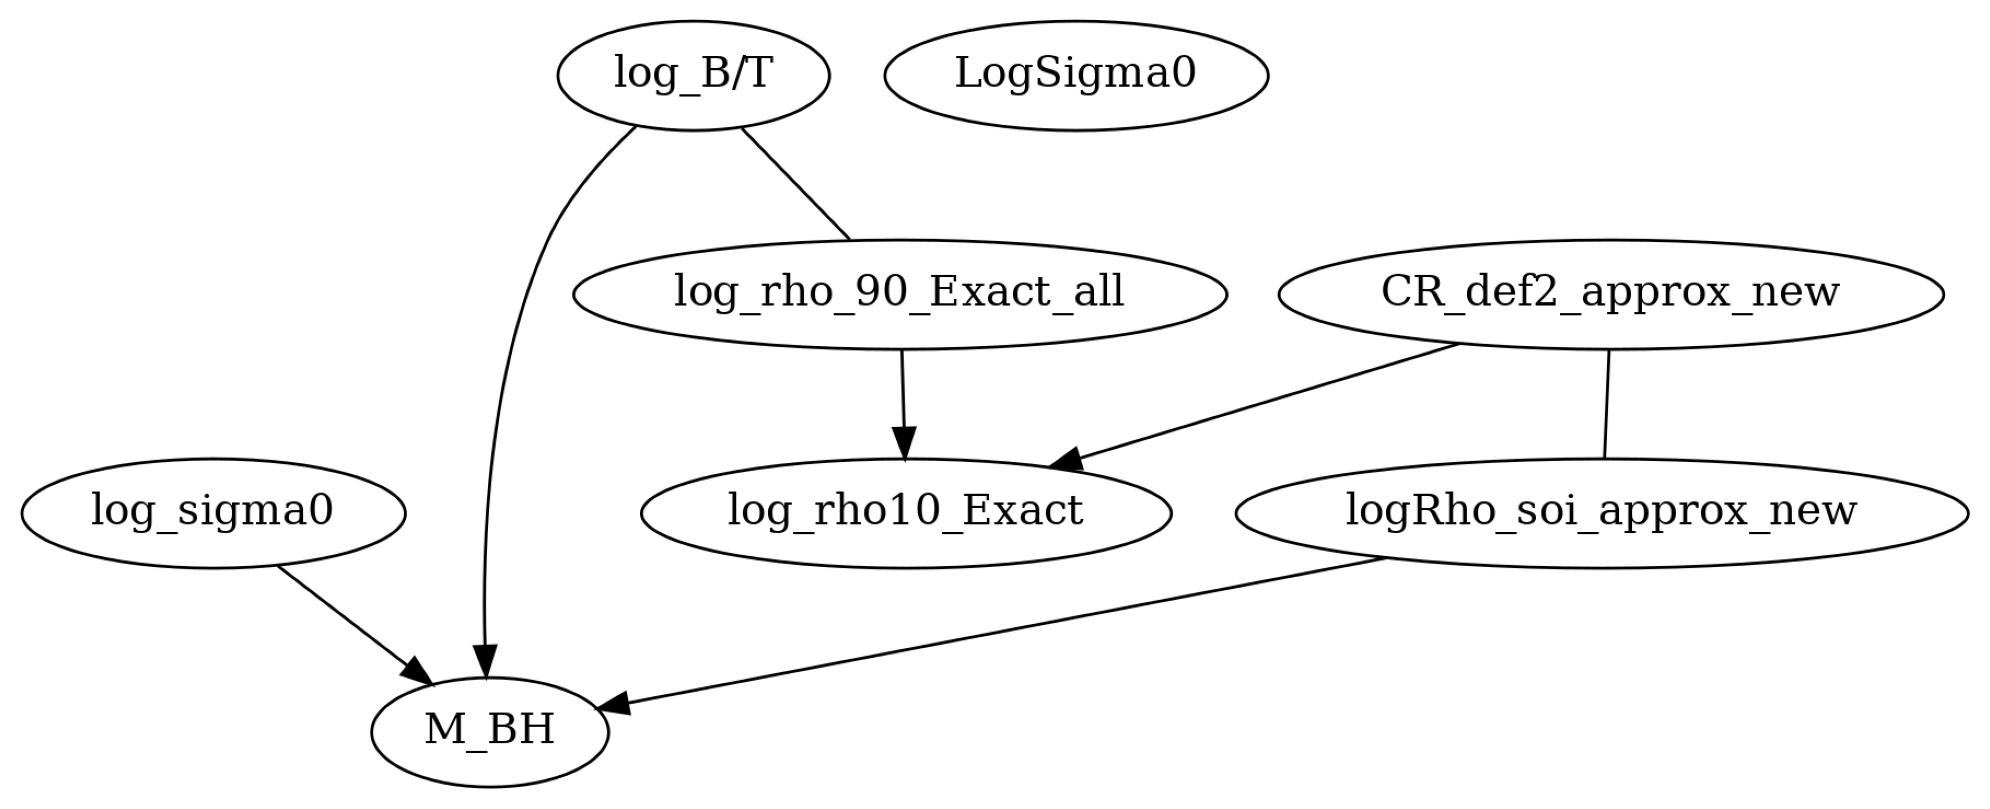

In [24]:


para=['log_sigma0','log_B/T','log_rho10_Exact','log_rho_90_Exact_all','CR_def2_approx_new','LogSigma0','M_BH','logRho_soi_approx_new']
df_test=df[para]
cg = pc(np.array(df_test),indep_test='kci',alpha = 0.05)
# visualization using pydot
cg.draw_pydot_graph(labels=para)

  0%|          | 0/11 [00:00<?, ?it/s]

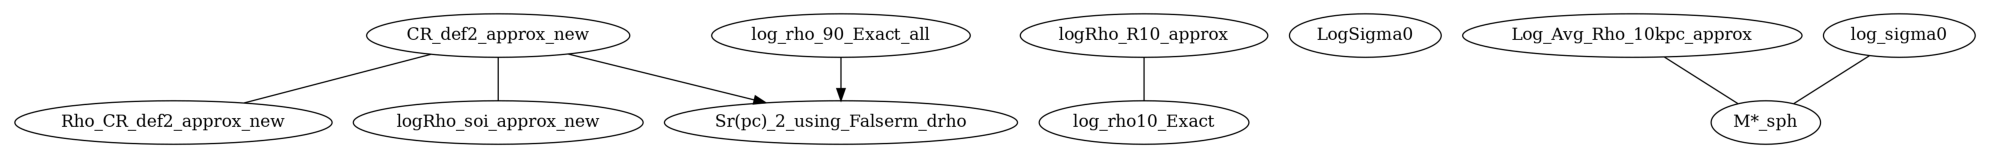

In [23]:
para=['CR_def2_approx_new', 'logRho_R10_approx', 'log_rho10_Exact',
       'Rho_CR_def2_approx_new', 'LogSigma0', 'Log_Avg_Rho_10kpc_approx',
       'Sr(pc)_2_using_Falserm_drho', 'log_sigma0', 'log_rho_90_Exact_all',
       'M*_sph','logRho_soi_approx_new']
df_test=df[para]
cg = pc(np.array(df_test),indep_test='kci',alpha = 0.05)
# visualization using pydot
cg.draw_pydot_graph(labels=para)

In [3]:
functions.test_relation(['log_sigma0','log_B/T','rho_soi_rf'])

100


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_B/T
x 2 : rho_soi_rf
Eq. selected rmse: 0.25681951656663055


2.558744096659513*x0 + x1 - 0.5587440966595129*x2 + 4.368837513042717

Eq. 0 rmse: 0.9082611474700466


8.233873226498426

Eq. 1 rmse: 0.43800877310318376


3.6607788794721015*x0

Eq. 2 rmse: 0.43794834945875516


4.0167200893394455*x0 - 0.9756112909824195

Eq. 3 rmse: 0.3572527673270779


x0*(x0 + 0.5992239904617306) + 1.7770848233649834

Eq. 4 rmse: 0.3323149330439481


x0**2 + 2.8929215307296294 + 0.6397849028975136/x2

Eq. 5 rmse: 0.29272869095163306


1.734672623476266*x0 + x1 - 0.734672623476266*x2 + 6.702205746944934

Eq. 6 rmse: 0.25681951656663055


2.558744096659513*x0 + x1 - 0.5587440966595129*x2 + 4.368837513042717

Eq. 7 rmse: 0.2568195165666304


2.5587440941531883*x0 + x1 - 0.5587440941531883*x2 + 4.3688375139163513

Eq. 8 rmse: 0.25169811461107355


x0**2 - x0 + 0.75720359173411019*x1 - x2 + 7.167642034487812 + x2/x0

Eq. 9 rmse: 0.246854819216591


x0**2 + x0*x1/x2 - x0 - x2 + 7.171818613314906 + x2/x0

Eq. 10 rmse: 0.23607071606960067


x0**2 - x0 + x1/(1.9018260485671359*x1 + x2) - x2 + 7.12530703250443 + x2/x0

In [13]:
y_pred = rf_regressor.predict(X)

In [18]:
df['rho_soi_rf']=y_pred

In [7]:
df.to_csv('SMBH_Data_0906_test.csv',index=False)

In [4]:
df=pd.read_csv('SMBH_Data_0906_test.csv',header=0)

In [17]:
df

,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,Pseudobulge,BCG,cD,...,LogSigma0,R10,logR10,logR10phi,Rh,logRh,logRhphi,logHalo,rho_soi_rf,M_BH_std
0,0,0.0,0,1.0,0,0,1.0,0,1,0,...,4.704516,34.766963,1.541167,10.148833,8.079469,0.907383,10.782617,13.959319,2.479319,NaN
1,0,0.0,0,0.0,0,0,1.0,0,1,0,...,4.033710,18.612540,1.269806,10.470194,7.044676,0.847861,10.892139,14.060462,1.972528,0.20
2,1,1.0,0,0.0,0,0,0.0,0,0,0,...,3.790449,9.360143,0.971282,9.791918,1.618051,0.208992,10.554208,12.563130,3.328863,NaN
3,0,1.0,0,0.0,0,0,0.0,0,0,0,...,4.008665,0.697465,-0.156477,9.346477,0.365014,-0.437691,9.627691,11.525458,2.931372,0.09
4,0,1.0,0,1.0,0,0,0.0,0,1,0,...,4.059098,11.966130,1.077954,10.302046,2.962211,0.471616,10.908384,13.405242,2.460825,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1.0,0,0.0,0,0,0.0,1,0,0,...,4.714507,18.008377,1.255475,10.014525,2.434609,0.386429,10.883571,13.233744,3.524960,0.15
96,0,1.0,1,0.0,0,0,1.0,1,0,0,...,4.836918,8.813445,0.945146,9.564854,0.942243,-0.025837,10.535837,12.289895,3.217675,0.11
97,0,1.0,0,0.0,0,0,1.0,1,0,0,...,4.798361,10.510415,1.021620,9.718380,1.828245,0.262034,10.477966,12.536387,2.175576,NaN
98,0,1.0,0,0.0,0,0,0.0,1,0,0,...,4.714823,16.634078,1.220999,9.589001,3.155569,0.499078,10.310922,12.618079,1.355353,NaN


In [14]:
df_full = pd.read_csv('SMBH_Data_0522.csv',header=1)
keys=['Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD', 'M_BH','M_BH_std','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo']
df_std = df_full[keys].dropna(axis='index',how='any')
df_std

,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,Pseudobulge,BCG,cD,...,logblum,logSigma0sph,LogSigma0,R10,logR10,logR10phi,Rh,logRh,logRhphi,logHalo
1,0,0.0,0,1.0,0,0,1.0,0,1,0,...,10.7372,8.218084,4.704516,34.766963,1.541167,10.148833,8.079469,0.907383,10.782617,13.959319
3,0,0.0,0,0.0,0,0,1.0,0,1,0,...,11.1172,5.486389,4.033710,18.612540,1.269806,10.470194,7.044676,0.847861,10.892139,14.060462
5,1,1.0,0,0.0,0,0,0.0,0,0,0,...,10.2816,6.294257,3.790449,9.360143,0.971282,9.791918,1.618051,0.208992,10.554208,12.563130
6,0,1.0,0,0.0,0,0,0.0,0,0,0,...,8.7472,4.025433,4.008665,0.697465,-0.156477,9.346477,0.365014,-0.437691,9.627691,11.525458
7,0,1.0,0,1.0,0,0,0.0,0,1,0,...,10.7976,3.648904,4.059098,11.966130,1.077954,10.302046,2.962211,0.471616,10.908384,13.405242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,1,1.0,0,0.0,0,0,0.0,1,0,0,...,10.8796,8.242104,4.714507,18.008377,1.255475,10.014525,2.434609,0.386429,10.883571,13.233744
133,0,1.0,1,0.0,0,0,1.0,1,0,0,...,10.0440,4.922064,4.836918,8.813445,0.945146,9.564854,0.942243,-0.025837,10.535837,12.289895
134,0,1.0,0,0.0,0,0,1.0,1,0,0,...,9.9796,4.021619,4.798361,10.510415,1.021620,9.718380,1.828245,0.262034,10.477966,12.536387
136,0,1.0,0,0.0,0,0,0.0,1,0,0,...,10.5304,4.140150,4.714823,16.634078,1.220999,9.589001,3.155569,0.499078,10.310922,12.618079


In [23]:
df['M_BH_std']=np.array(df_std['M_BH_std'])

In [22]:
df_std['M_BH_std']

1      0.20
3      0.09
5      0.13
6      0.10
7      0.10
       ... 
132    0.09
133    0.11
134    0.12
136    0.10
142    0.12
Name: M_BH_std, Length: 100, dtype: float64

In [24]:
df

,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,Pseudobulge,BCG,cD,...,LogSigma0,R10,logR10,logR10phi,Rh,logRh,logRhphi,logHalo,rho_soi_rf,M_BH_std
0,0,0.0,0,1.0,0,0,1.0,0,1,0,...,4.704516,34.766963,1.541167,10.148833,8.079469,0.907383,10.782617,13.959319,2.479319,0.20
1,0,0.0,0,0.0,0,0,1.0,0,1,0,...,4.033710,18.612540,1.269806,10.470194,7.044676,0.847861,10.892139,14.060462,1.972528,0.09
2,1,1.0,0,0.0,0,0,0.0,0,0,0,...,3.790449,9.360143,0.971282,9.791918,1.618051,0.208992,10.554208,12.563130,3.328863,0.13
3,0,1.0,0,0.0,0,0,0.0,0,0,0,...,4.008665,0.697465,-0.156477,9.346477,0.365014,-0.437691,9.627691,11.525458,2.931372,0.10
4,0,1.0,0,1.0,0,0,0.0,0,1,0,...,4.059098,11.966130,1.077954,10.302046,2.962211,0.471616,10.908384,13.405242,2.460825,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1.0,0,0.0,0,0,0.0,1,0,0,...,4.714507,18.008377,1.255475,10.014525,2.434609,0.386429,10.883571,13.233744,3.524960,0.09
96,0,1.0,1,0.0,0,0,1.0,1,0,0,...,4.836918,8.813445,0.945146,9.564854,0.942243,-0.025837,10.535837,12.289895,3.217675,0.11
97,0,1.0,0,0.0,0,0,1.0,1,0,0,...,4.798361,10.510415,1.021620,9.718380,1.828245,0.262034,10.477966,12.536387,2.175576,0.12
98,0,1.0,0,0.0,0,0,0.0,1,0,0,...,4.714823,16.634078,1.220999,9.589001,3.155569,0.499078,10.310922,12.618079,1.355353,0.10


In [5]:
df['rho_soi_rf_std']=0.4178738790528491

In [6]:
df

,Bar,Disk,Ring,Core,Multiple,Compactness,AGN,Pseudobulge,BCG,cD,...,R10,logR10,logR10phi,Rh,logRh,logRhphi,logHalo,rho_soi_rf,M_BH_std,rho_soi_rf_std
0,0,0.0,0,1.0,0,0,1.0,0,1,0,...,34.766963,1.541167,10.148833,8.079469,0.907383,10.782617,13.959319,2.479319,0.20,0.417874
1,0,0.0,0,0.0,0,0,1.0,0,1,0,...,18.612540,1.269806,10.470194,7.044676,0.847861,10.892139,14.060462,1.972528,0.09,0.417874
2,1,1.0,0,0.0,0,0,0.0,0,0,0,...,9.360143,0.971282,9.791918,1.618051,0.208992,10.554208,12.563130,3.328863,0.13,0.417874
3,0,1.0,0,0.0,0,0,0.0,0,0,0,...,0.697465,-0.156477,9.346477,0.365014,-0.437691,9.627691,11.525458,2.931372,0.10,0.417874
4,0,1.0,0,1.0,0,0,0.0,0,1,0,...,11.966130,1.077954,10.302046,2.962211,0.471616,10.908384,13.405242,2.460825,0.10,0.417874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1.0,0,0.0,0,0,0.0,1,0,0,...,18.008377,1.255475,10.014525,2.434609,0.386429,10.883571,13.233744,3.524960,0.09,0.417874
96,0,1.0,1,0.0,0,0,1.0,1,0,0,...,8.813445,0.945146,9.564854,0.942243,-0.025837,10.535837,12.289895,3.217675,0.11,0.417874
97,0,1.0,0,0.0,0,0,1.0,1,0,0,...,10.510415,1.021620,9.718380,1.828245,0.262034,10.477966,12.536387,2.175576,0.12,0.417874
98,0,1.0,0,0.0,0,0,0.0,1,0,0,...,16.634078,1.220999,9.589001,3.155569,0.499078,10.310922,12.618079,1.355353,0.10,0.417874
